This notebook gives an example of how to use our numerical solver to perform calculations of transit durations and peak-to-peak and RMS TDVs for binary planet systems.

In [1]:
from binary import *
import matplotlib.pyplot as plt

Say we want to plot the transit duration (as a function of phase) for a system of binary Jupiters around a Sun-like star at an orbital radius of 0.3 AU (corresponding to a period of 60 days). Their separation will be twice their summed radii, and their impact parameter will be zero.

Text(0.5, 0, 'binary phase [rad]')

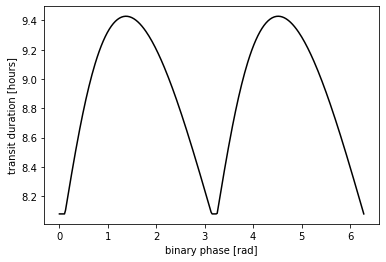

In [2]:
phis = np.linspace(0, 2*np.pi, 300) #initialize grid of phase angles with a resolution of 300 bins
#tdur_grid is how we can easily get the transit duration. The parameters are as follows:
#    R_S: stellar radius (in units of Rsun)
#    R_p: planet radius (in units of Rjup)
#    R_s: satellite radius (in units of Rsat); the satellite should be the smaller object.
#    a_sp: binary separation as a multiple of the summed radii
#    P: barycentric period around the star (days)
#    a: barycentric orbital radius around the star (AU) -- assumes of a circular orbit
#    b: impact parameter

tdurs = tdur_grid(phis, R_S=1, R_p=1, R_s=1, a_sp=2, P=60, a=0.3, b=0)
plt.plot(phis, tdurs, color='black')
plt.ylabel('transit duration [hours]')
plt.xlabel('binary phase [rad]')

If I don't want a whole grid of transit durations, and just want a specific value, I can just call tdur_grid with a single-element array. The value of the transit duration is calculated using the numerical methods of scipy.optimize.
Note that the above plot is symmetric on the intervals [0, 𝜋] and [𝜋, 2𝜋]--that's because we've used an exact binary case. Let's see what happens if we have a satellite with 0.8x the radius of the planet:

Text(0.5, 0, 'binary phase [rad]')

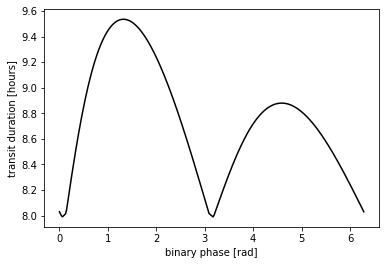

In [3]:
tdurs = tdur_grid(phis, R_S=1, R_p=1, R_s=0.8, a_sp=2, P=60, a=0.3, b=0)
plt.plot(phis, tdurs, color='black')
plt.ylabel('transit duration [hours]')
plt.xlabel('binary phase [rad]')

So the symmetry from before is broken.
Let's now see how to compute the peak-to-peak TDV amplitude: we can just use np.ptp on our previously calculated grid of durations.

In [4]:
tdv_ptp = np.ptp(tdurs)
print(f'Peak-to-peak amplitude: {tdv_ptp} hrs')

Peak-to-peak amplitude: 1.545376951976575 hrs
